<h1>Analyse De Donnees Meteorologiques<h1>


In [70]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

<h2>1-Dataset<h2>


In [73]:

# Read in the data
url = "C:/Users/Hp/Desktop/ml/clean_weather.csv"
df = pd.read_csv(url)

# Fill in any missing values in the data with past values
data = df.ffill()

# Show the first 5 rows of the data
data = data.drop(columns=['Unnamed: 0'])
data.head(20)


,tmax,tmin,rain,tmax_tomorrow
0,60.0,35.0,0.00,52.0
1,52.0,39.0,0.00,52.0
2,52.0,35.0,0.00,53.0
3,53.0,36.0,0.00,52.0
4,52.0,35.0,0.00,50.0
5,50.0,38.0,0.00,52.0
6,52.0,43.0,0.00,56.0
7,56.0,49.0,0.24,54.0
8,54.0,50.0,0.40,57.0
9,57.0,50.0,0.00,57.0


In [75]:
# Sélectionner les colonnes nécessaires
x = data.iloc[:,:-1]  # Caractéristiques
y = data.iloc[:,-1]   # Cible


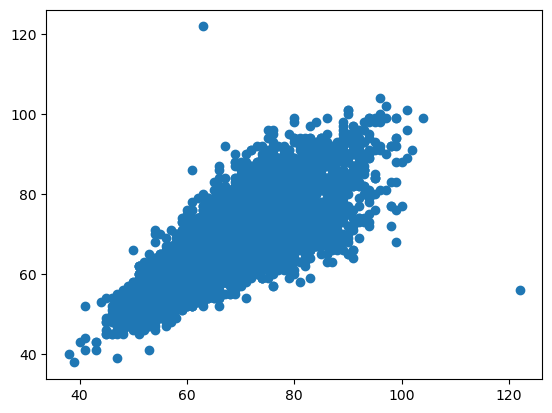

In [77]:
plt.scatter(x.iloc[:, 0], y)


In [78]:
# Verification des dimensions
print(x.shape)
print(y.shape)

# redimensionner y
y = y.values.reshape(y.shape[0], 1)
print(y.shape)



(13509, 3)
(13509,)
(13509, 1)


In [81]:
# Création de la matrice X, inclut le Biais
X = np.hstack((x, np.ones((x.shape[0], 1)))) # ajoute un vecteur Biais de dimension (x.shape[0], 1)

print(X.shape)
print(X[:10])


(13509, 4)
[[60.   35.    0.    1.  ]
 [52.   39.    0.    1.  ]
 [52.   35.    0.    1.  ]
 [53.   36.    0.    1.  ]
 [52.   35.    0.    1.  ]
 [50.   38.    0.    1.  ]
 [52.   43.    0.    1.  ]
 [56.   49.    0.24  1.  ]
 [54.   50.    0.4   1.  ]
 [57.   50.    0.    1.  ]]


In [83]:
# Initialisation du vecteur theta aléatoire, avec 4 éléments (car X a quatres colonnes)
theta = np.random.randn(4, 1)
theta

array([[-1.00318533],
       [ 0.17248198],
       [ 1.09536039],
       [-1.74668479]])

<h2>2-Modèle Linéaire<h2>

In [86]:
def model(X, theta):
    return X.dot(theta)

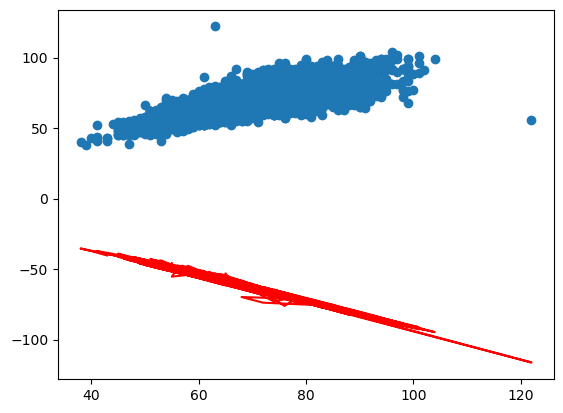

In [88]:
plt.scatter(X[:,0], y)
plt.plot(X[:,0], model(X, theta), c='r')

<h2>3-Fonction Cout<h2>

In [91]:
#On mesure les erreurs du modele sur le Dataset X,y en implémentent l'erreur quadratique moyenne,
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [92]:
cost_function(X, y, theta)


7969.190464152861

<h2>4-Gradient Descent<h2>

In [94]:
#On implémente la formule du gradient pour la MSE
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [95]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

<h2>5- Phase d'entrainement <h2>

In [97]:
#On définit un nombre d'itérations, ainsi qu'un pas d'apprentissage 
n_iterations = 100
learning_rate = 0.0001

theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

In [98]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)

theta_final

array([[ 0.3170219 ],
       [ 0.92548619],
       [ 1.09372406],
       [-1.72760408]])

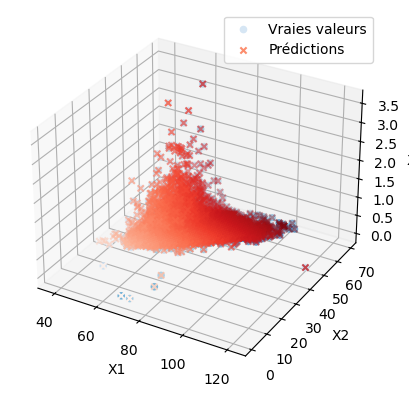

In [102]:
from mpl_toolkits.mplot3d import Axes3D  # Pour les graphiques 3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Tracer les vraies valeurs (en bleu)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='Blues', label='Vraies valeurs', marker='o')

# Tracer les prédictions (en rouge)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=predictions, cmap='Reds', label='Prédictions', marker='x')

# Ajouter des labels et une légende
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.legend()

plt.show()

In [106]:

pip install plotly

Note: you may need to restart the kernel to use updated packages.


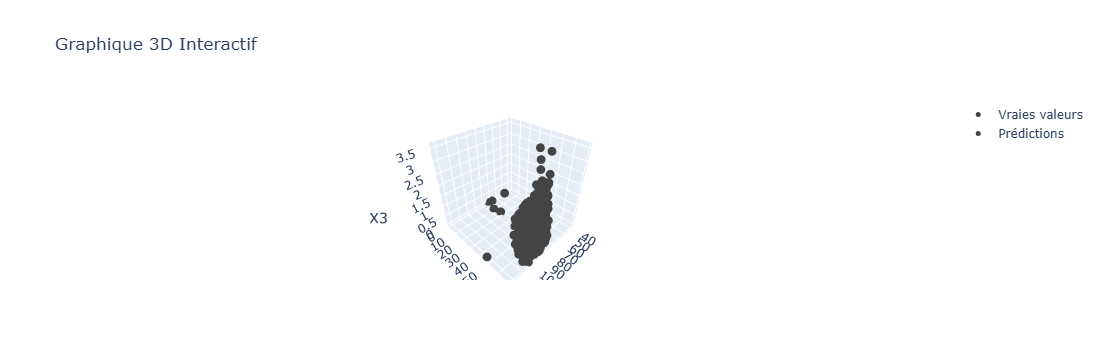

In [107]:
import plotly.graph_objects as go
# Tracer les vraies valeurs
trace1 = go.Scatter3d(
    x=X[:, 0], y=X[:, 1], z=X[:, 2],
    mode='markers',
    marker=dict(size=5, color=y, colorscale='Blues'),
    name='Vraies valeurs'
)

# Tracer les prédictions
trace2 = go.Scatter3d(
    x=X[:, 0], y=X[:, 1], z=X[:, 2],
    mode='markers',
    marker=dict(size=5, color=predictions, colorscale='Reds'),
    name='Prédictions'
)

# Créer la figure
fig = go.Figure(data=[trace1, trace2])

# Ajouter des labels et configurer la vue
fig.update_layout(
    scene=dict(
        xaxis_title='X1',
        yaxis_title='X2',
        zaxis_title='X3'
    ),
    title="Graphique 3D Interactif"
)

fig.show()

<h2>6- Courbe d'apprentissage <h2>

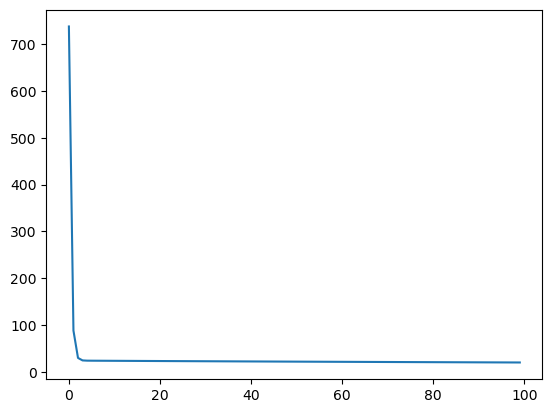

In [110]:
plt.plot(range(n_iterations), cost_history)


In [111]:
z=np.array([59,54,0,1])
s=theta_final
model(z,s)

array([66.95294216])